## PyTorch로 선형 회귀 모델 만들기

2개의 탱크에는 각각 x1 가스와 x2 가스가 담겨있다.<br>
두 가스는 모두 무해하지만, 섞이면 유독성을 띄게된다.<br>
유독성 정도는 섞이는 양에 따라 결정되는데, 정확히 알려진 공식은 없고 데이터만 있다.<br>
기본적으로 아래 공간의 유독성은 '1'이라고 알려져 있다.

- 유독성 = 1 + a * 1가스의 양 + b * 2가스의 양<br>
x1가스와 x2가스의 양이 주어졌을 때, 측정한 유독성 값과 식으로 계산된 유독성 값 간의 차이를 최소로 하는 a와 b의 값을 찾으면 된다.<br>
=> 즉, (toxic - (1 + a * x1 + b * x2))^2<br>
차이에 따른 양수/음수를 없애기 위해 제곱!

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

In [ ]:
basic = torch.ones(13, dtype=torch.float32)
x1_gas = torch.tensor([0,73,31,39,78,22,96,82,24,81,61,28,91], dtype=torch.float32)
x2_gas = torch.tensor([11,88,81,2,73,88,8,64,80,45,67,34,25], dtype=torch.float32)
toxic = torch.FloatTensor([34,411,306,85,376,309,217,357,289,298,324,159,258])
# print(toxic.dtype)

In [ ]:
basic = basic.view((-1,1)) # 13x1로 변경
#print(basic.size())

In [ ]:
x1_gas = x1_gas.view((-1,1))  # 13x1로 변경
#print(x1_gas.size())

In [ ]:
x2_gas = x2_gas.view((-1,1))  # 13x1로 변경
#print(x2_gas.size())

In [ ]:
toxic = toxic.view((-1,1))   # 13x1로 변경

In [ ]:
X = torch.cat([basic, x1_gas, x2_gas], dim=1) # 13x3로 변경
#print('X size: ', X.size())
#print(X)

In [ ]:
net = nn.Linear(in_features=3, out_features=1, bias=False)  # input 3개, output 1개
# net은 사람이라고 생각
optimizer = optim.SGD(net.parameters(), lr=0.0001)  # lr = learning rate
# optimizer는 비유하자면 과외선생님, net이라는 사람의 뇌(parameters)를 SGD방법으로 학습시킨다.
loss_fn = nn.MSELoss()
# loss_fn은 비유하자면 평가방법, 즉 수능(MSELoss)이라고 생각

losses = [] # losses는 비유하자면 매달 치르는 모의고사 성적표를 한데 모아놓은 것이라고 생각

In [ ]:
for epoch in range(15):
  optimizer.zero_grad() # 최솟값을 찾기위해 방향을 오른쪽으로 갈지 왼쪽으로 갈지 결정해 주기 전에 0으로 초기화
  # 비유하자면 과외선생님이 학생의 실력을 잘 모르니 가르칠 방향을 정하지 못하는것?

  y_pred = net(X) 
  # y_pred는 비유하자면 실력 test, net이란 학생에게 X(13x3의 data)라는 문제를 주고 풀게 하는 것
  #print(y_pred.size(), toxic.size())

  loss = loss_fn(y_pred, toxic)  # loss는 점수, loss의 값은 tensor로 나온다.
  # 비유하자면 loss_fn이라는 평가방법에 학생의 실력 test인 y_pred와 정답인 toxic를 넣고 체점해 점수를 매기는 것
  loss.backward() # 상세한 성적이 나옴(ex 국어는 몇점, 수학은 몇점)

  optimizer.step()  # optimizer라는 과외선생님이 loss.backward()의 결과를 보고 학생을 가르칠 방향을 잡는다.
  # 미분한 값이 양수니까 왼쪽으로 가야 최솟값을 찾을 수 있겠다라고 알려주는 것
  losses.append(loss.item()) # 성적표에 기재

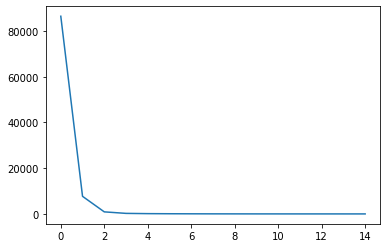

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
print(list(net.parameters()))

[Parameter containing:
tensor([[-0.2267,  2.0324,  2.9864]], requires_grad=True)]


### x1 gas = 100.0, x2 gas = 100.0인 경우, toxic level 예측

In [ ]:
input_value = torch.tensor((1,100,100), dtype=torch.float)
toxic_level = net(input_value)
print('toxic_level: ', toxic_level)
print('toxic_level: ', toxic_level.item())

toxic_level:  tensor([501.6558], grad_fn=<SqueezeBackward3>)
toxic_level:  501.65576171875
